Load and filter data

In [ ]:
# Notebook by Heidi Chen
import matplotlib.pyplot as plt
import pandas as pd
import geopandas

In [ ]:
# read data
nhpd = pd.read_excel("/content/data/active_and_inconclusive_properties.xlsx")
print(nhpd.shape)

(82287, 252)
   NHPDPropertyID  ... OldNHPDPropertyID
0         1000000  ...               NaN
1         1000001  ...               NaN
2         1000002  ...               NaN
3         1000003  ...               NaN
4         1000004  ...               NaN

[5 rows x 252 columns]


In [ ]:
print(nhpd.head())

(82287, 252)


,NHPDPropertyID,PropertyName,PropertyAddress,City,State,Zip,CBSACode,CBSAType,County,CountyCode,CensusTract,CongressionalDistrict,Latitude,Longitude,PropertyStatus,ActiveSubsidies,TotalInconclusiveSubsidies,TotalInactiveSubsidies,TotalUnits,EarliestStartDate,EarliestEndDate,LatestEndDate,Owner,OwnerType,ManagerName,ManagerType,HUDPropertyID,ReacScore1,ReacScore1Date,ReacScore2,ReacScore2Date,ReacScore3,ReacScore3Date,StudioOneBedroomUnits,TwoBedroomUnits,ThreePlusBedroomUnits,PercentofELIHouseholds,TargetTenantType,FairMarketRent_2BR,EarliestConstructionDate,...,PH_2_InacStatusDesc,PH_2_PhaCode,NumberActiveState,NumberInconclusiveState,NumberInactiveState,State_1_ID,State_1_Status,State_1_ProgramName,State_1_StartDate,State_1_EndDate,State_1_AssistedUnits,State_1_InacStatusDesc,State_1_ConstructionType,State_2_ID,State_2_Status,State_2_ProgramName,State_2_StartDate,State_2_EndDate,State_2_AssistedUnits,State_2_InacStatusDesc,State_2_ConstructionType,NumberActivePBV,NumberInconclusivePBV,NumberInactivePBV,Pbv_1_Status,Pbv_1_ProgramName,Pbv_1_AssistedUnits,Pbv_2_Status,Pbv_2_ProgramName,Pbv_2_AssistedUnits,NumberActiveMR,NumberInconclusiveMR,NumberInactiveMR,Mr_1_Status,Mr_1_ProgramName,Mr_1_AssistedUnits,Mr_2_Status,Mr_2_ProgramName,Mr_2_AssistedUnits,OldNHPDPropertyID
0,1000000,IVY ESTATES,6729 Zeigler Blvd,Mobile,AL,36608-4253,33660.0,Metropolitan Statistical Area,Mobile,1097.0,1.097004e+09,01,30.708540,-88.200550,Active,1,0,0,14,2020-08-11 00:00:00,2045-08-10,2045-08-10,PORT CITY HOUSING INC,Non-Profit,VOLUNTEERS OF AMERICA SOUTHEAST INC,Profit Motivated,800215076.0,85c,2019-08-22,99a,2016-03-03,NaN,NaT,14.0,0.0,0.0,53.0,Disabled,920.0,2003-01-01,...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000001,RENDU TERRACE WEST,7400 Old Shell Rd,Mobile,AL,36608-4549,33660.0,Metropolitan Statistical Area,Mobile,1097.0,1.097006e+09,01,30.693016,-88.214826,Active,1,0,0,50,2020-12-14 00:00:00,2047-12-13,2047-12-13,RENDU TERRACE WEST INC,Non-Profit,VOLUNTEERS OF AMERICA SOUTHEAST INC,Profit Motivated,800219680.0,97b,2018-03-12,97b,2018-03-09,85c,2015-10-08,49.0,0.0,0.0,73.0,Elderly,860.0,2005-01-01,...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1000002,TWB RESIDENTIAL OPPORTUNITIES II,93 Canal Rd,Port Jefferson Station,NY,11776-3024,35620.0,Metropolitan,Suffolk,36103.0,3.610316e+10,01,40.923630,-73.041180,Active,1,0,0,12,2020-08-05 00:00:00,2042-08-04,2042-08-04,TWB RESIDENTIAL OPPORTUNITIES II INC,Non-Profit,THE WAY BACK INC,Profit Motivated,800211791.0,89c,2018-08-08,96b,2014-03-14,96b,2014-03-11,12.0,0.0,0.0,100.0,Disabled,2130.0,2000-01-01,...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1000003,THE DAISY HOUSE,615 Clarissa St,Rochester,NY,14608-2485,40380.0,Metropolitan,Monroe,36055.0,3.605501e+10,25,43.144760,-77.617220,Active,2,0,0,49,2021-01-05 00:00:00,2038-01-04,2046-01-31,DAISY HOUSING DEVELOPMENT FUND COMPANY,Non-Profit,FREDERICK DOUGLAS COMMUNITY DEVELOPMENT CORPOR...,Non-Profit,800215064.0,76c,2018-03-19,76c,2015-10-01,82c*,2015-09-30,49.0,0.0,0.0,58.0,Elderly,940.0,1996-01-01,...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1000004,MAIN AVENUE APARTMENTS,105 E Walnut St,Sylacauga,AL,35150-3012,45180.0,Micropolitan Statistical Area,Talladega,1121.0,1.121012e+09,03,33.163565,-86.248770,Active,1,0,0,24,2021-03-13 00:00:00,2040-03-12,2040-03-12,COOSA VALLEY SENIORS HOUSING INC,Non-Profit,SPM LLC,Profit Motivated,800112267.0,92a,2020-03-10,99a,2015-11-04,99a,2015-11-02,24.0,0.0,0.0,38.0,Elderly,1000.0,1998-01-01,...,NaN,NaN,0,0,0,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaT,NaN,NaN,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,NaN,NaN,

In [ ]:
# Subset to Florida Counties
nhpd_fl = nhpd[nhpd['State'].isin(['FL'])]

# See number of records for each county
nhpd_fl['County'].value_counts()

Miami-Dade      535
Broward         203
Hillsborough    192
Orange          183
Pinellas        178
               ... 
Baker             3
Dixie             2
Lafayette         1
Gilchrist         1
Glades            1
Name: County, Length: 66, dtype: int64

In [ ]:
# NA cleaning - adapted from Nupur Neti's notebook
# Subset cols which have less NAs than max_NA_percentage and drop them 
max_NA_percentage = 0.5
print("Total Columns", nhpd_fl.shape[1])
nhpd_fl_without_na = nhpd_fl.loc[:, nhpd_fl.isnull().sum() < max_NA_percentage*nhpd_fl.shape[0]]
print("Total Columns after removing columns with high NAs", nhpd_fl_without_na.shape[1])

Total Columns 252
Total Columns after removing columns with high NAs 69


In [ ]:
nhpd_fl_without_na.head()

,NHPDPropertyID,PropertyName,PropertyAddress,City,State,Zip,CBSACode,CBSAType,County,CountyCode,CensusTract,CongressionalDistrict,Latitude,Longitude,PropertyStatus,ActiveSubsidies,TotalInconclusiveSubsidies,TotalInactiveSubsidies,TotalUnits,EarliestStartDate,EarliestEndDate,LatestEndDate,Owner,OwnerType,ManagerName,StudioOneBedroomUnits,TwoBedroomUnits,ThreePlusBedroomUnits,TargetTenantType,FairMarketRent_2BR,EarliestConstructionDate,LatestConstructionDate,NumberActiveSection8,NumberInconclusiveSection8,NumberInactiveSection8,NumberActiveSection202,NumberInconclusiveSection202,NumberInactiveSection202,NumberActiveSection236,NumberInconclusiveSection236,NumberInactiveSection236,NumberActiveHUDInsured,NumberInconclusiveHUDInsured,NumberInactiveHud,NumberActiveLihtc,NumberInconclusiveLihtc,NumberInactiveLihtc,NumberActiveSection515,NumberInconclusiveSection515,NumberInactiveSection515,NumberActiveSection538,NumberInconclusiveSection538,NumberInactiveSection538,NumberActiveHome,NumberInconclusiveHome,NumberInactiveHome,NumberActivePublicHousing,NumberInconclusivePublicHousing,NumberInactivePublicHousing,NumberActiveState,NumberInconclusiveState,NumberInactiveState,NumberActivePBV,NumberInconclusivePBV,NumberInactivePBV,NumberActiveMR,NumberInconclusiveMR,NumberInactiveMR,OldNHPDPropertyID
144,1000147,SUNTERRA APARTMENTS,3541 Evans Ave,Fort Myers,FL,33901-8328,15980.0,Metropolitan Statistical Area,Lee,12071.0,1.207100e+10,19,26.611710,-81.859790,Active,1,0,0,120,2012-10-01 00:00:00,2022-09-30,2022-09-30,SUNTERRA APTS LLC,Profit Motivated,PARK INC,23.0,60.0,7.0,Family,1070.0,1969-01-01,1969-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
159,1000163,BUENA VISTA APARTMENTS,521 SW 6th St,Miami,FL,33130-2773,33100.0,Metropolitan Statistical Area,Miami-Dade,12086.0,1.208600e+10,27,25.768320,-80.202970,Active,1,0,0,21,2017-07-01 00:00:00,2022-06-30,2022-06-30,LH BUENA VISTA LLC,Profit Motivated,WELLER WORKFORCE LLC,19.0,2.0,0.0,Elderly,1470.0,1979-01-01,1979-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
161,1000165,VILLA BEATRIZ,776 NW 2nd St,Miami,FL,33128-1454,33100.0,Metropolitan Statistical Area,Miami-Dade,12086.0,1.208600e+10,27,25.775370,-80.207630,Active,1,0,0,24,2021-03-01 00:00:00,2022-02-28,2022-02-28,GRUPO HABITA 776 LLC,Profit Motivated,CENTURION MANAGEMENT & CONSULTING SERVICES LLC,24.0,0.0,0.0,Elderly,1470.0,1979-01-01,1979-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
168,1000172,PORTILLO APARTMENTS,3559 Portillo Rd,Spring Hill,FL,34608,45300.0,Metropolitan Statistical Area,Hernando,12053.0,1.205304e+10,11,28.485360,-82.546320,Active,1,0,0,15,2021-03-01 00:00:00,2042-02-28,2042-02-28,HBHCI HUD 7 INC,Non-Profit,THE COLUMBIA PROPERTY GROUP INC,14.0,0.0,0.0,Disabled,1180.0,2000-01-01,2000-01-01,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN
546,1000611,PHASE IV-B,4231 Machiavelli Ln,Fort Myers,FL,33916-4870,15980.0,Metropolitan Statistical Area,Lee,12071.0,1.207100e+10,19,26.645226,-81.831148,Active,1,0,0,50,NaN,NaT,NaT,HOUSING AUTHORITY OF THE CITY OF FORT MYERS,Public Entity,HOUSING AUTHORITY OF THE CITY OF FORT MYERS,NaN,NaN,NaN,NaN,1070.0,NaT,NaT,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
# geojson from https://github.com/danielcs88/fl_geo_json/blob/master/geojson-fl-counties-fips.json?short_path=058c5c7
florida_map = geopandas.read_file("/content/data/florida_counties.geojson")
florida_map.head()

Map absolute count of Florida low-income housing stock by county

In [ ]:

florida_map['County'] = florida_map['NAME']
nhpd_stock_by_county = nhpd_fl['County'].value_counts().rename_axis('County').reset_index(name='Low-income housing stock')

nhpd_florida_map = florida_map.merge( nhpd_stock_by_county, on='County')
print("Type of DataFrame : ", type(nhpd_florida_map))
nhpd_florida_map.sort_values(by="Low-income housing stock", ascending=False)

Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,County,Low-income housing stock
53,12086,0500000US12086,12,086,Miami-Dade,County,1897.716,"POLYGON ((-80.44049 25.95686, -80.32671 25.957...",Miami-Dade,535
25,12011,0500000US12011,12,011,Broward,County,1209.785,"POLYGON ((-80.27876 25.97097, -80.29519 25.970...",Broward,203
57,12057,0500000US12057,12,057,Hillsborough,County,1020.214,"POLYGON ((-82.64397 28.17330, -82.10585 28.171...",Hillsborough,192
2,12095,0500000US12095,12,095,Orange,County,903.429,"POLYGON ((-81.65739 28.55312, -81.65811 28.682...",Orange,183
54,12103,0500000US12103,12,103,Pinellas,County,273.799,"MULTIPOLYGON (((-82.82158 27.96444, -82.82980 ...",Pinellas,178
...,...,...,...,...,...,...,...,...,...,...
23,12003,0500000US12003,12,003,Baker,County,585.231,"POLYGON ((-82.05003 30.36249, -82.04924 30.273...",Baker,3
31,12029,0500000US12029,12,029,Dixie,County,705.053,"POLYGON ((-83.41228 29.66692, -83.37335 29.665...",Dixie,2
52,12067,0500000US12067,12,067,Lafayette,County,543.411,"POLYGON ((-83.36726 30.26044, -83.24986 30.260...",Lafayette,1
34,12043,0500000US12043,12,043,Glades,County,806.009,"POLYGON ((-80.94319 27.21060, -80.87117 27.154...",Glades,1


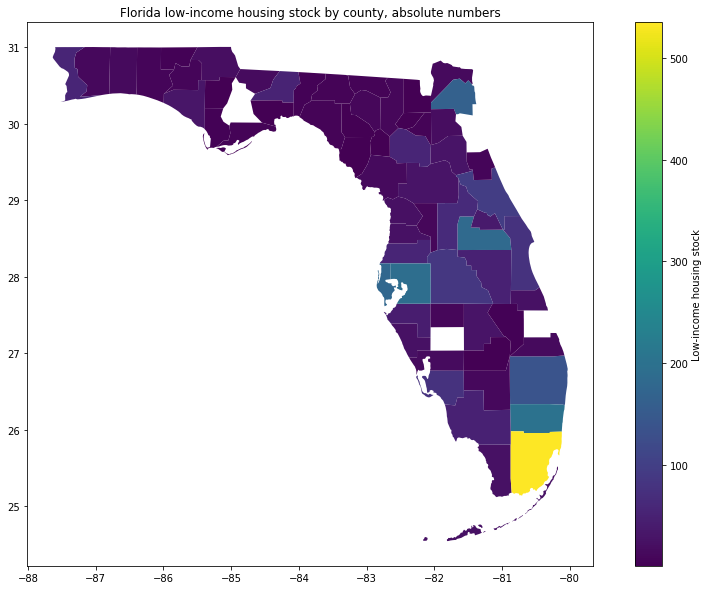

In [ ]:
nhpd_florida_map.plot("Low-income housing stock", figsize=(15,10), legend=True,legend_kwds={"label":"Low-income housing stock"},
                  missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title("Florida low-income housing stock by county, absolute numbers");

Map low-income housing stock relative to population 

In [ ]:
# Read in Florida population by county, from 2018 https://worldpopulationreview.com/us-counties/states/fl, which sources from https://www.census.gov/programs-surveys/popest/data.html
florida_population = pd.read_csv('/content/data/florida_counties_population.csv')
# Format to match other dfs
florida_population['County'] = florida_population['CTYNAME'].map(lambda s: s.replace(' County', ''))

In [ ]:
# merge population w/ map + nhpd
nhpd_florida_map_with_population = nhpd_florida_map.merge(florida_population, on='County')
nhpd_florida_map_with_population['Low-income housing stock relative to population'] = nhpd_florida_map_with_population['Low-income housing stock'] / nhpd_florida_map_with_population['pop2021']
print("Type of DataFrame : ", type(nhpd_florida_map_with_population))
nhpd_florida_map_with_population.sort_values(by="Low-income housing stock relative to population", ascending=False)


Type of DataFrame :  <class 'geopandas.geodataframe.GeoDataFrame'>


,id,GEO_ID,STATE,COUNTY,NAME,LSAD,CENSUSAREA,geometry,County,Low-income housing stock,CTYNAME,pop2021,GrowthRate,popDensity,Low-income housing stock relative to population
56,12037,0500000US12037,12,037,Franklin,County,534.725,"MULTIPOLYGON (((-84.77721 29.70740, -84.72984 ...",Franklin,7,Franklin County,13023,13.0273,12.8251,0.000538
40,12063,0500000US12063,12,063,Jackson,County,917.760,"POLYGON ((-85.15445 31.00083, -85.15222 31.000...",Jackson,21,Jackson County,43018,-13.3540,42.3642,0.000488
35,12045,0500000US12045,12,045,Gulf,County,564.012,"POLYGON ((-85.11566 30.19998, -85.15377 30.091...",Gulf,4,Gulf County,8625,-45.4976,8.4939,0.000464
36,12049,0500000US12049,12,049,Hardee,County,637.783,"POLYGON ((-82.05435 27.64638, -81.56332 27.646...",Hardee,11,Hardee County,26475,-4.5258,26.0726,0.000415
51,12047,0500000US12047,12,047,Hamilton,County,513.790,"POLYGON ((-83.18739 30.62722, -83.17441 30.626...",Hamilton,6,Hamilton County,14760,0.5244,14.5357,0.000407
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,12113,0500000US12113,12,113,Santa Rosa,County,1011.605,"POLYGON ((-86.91929 30.37067, -87.23297 30.349...",Santa Rosa,13,Santa Rosa County,194349,27.1019,191.3951,0.000067
50,12035,0500000US12035,12,035,Flagler,County,485.461,"POLYGON ((-81.21288 29.67067, -81.21156 29.667...",Flagler,8,Flagler County,121073,26.0311,119.2328,0.000066
13,12091,0500000US12091,12,091,Okaloosa,County,930.247,"POLYGON ((-86.39355 30.49344, -86.39417 30.466...",Okaloosa,14,Okaloosa County,218346,20.8234,215.0274,0.000064
19,12115,0500000US12115,12,115,Sarasota,County,555.868,"POLYGON ((-82.17166 27.03277, -82.25524 27.032...",Sarasota,26,Sarasota County,448568,18.0660,441.7503,0.000058


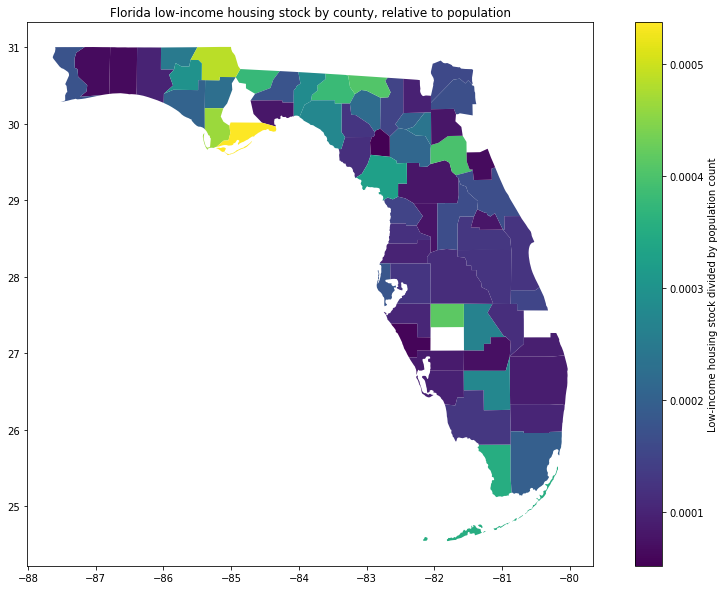

In [ ]:
nhpd_florida_map_with_population.plot("Low-income housing stock relative to population", figsize=(15,10), legend=True,legend_kwds={"label":"Low-income housing stock divided by population count"},
                  missing_kwds={
                               "color":"grey",
                               "edgecolor":"black",
                               "hatch":"---",
                               "label":"Missing Values"
                           })
plt.title("Florida low-income housing stock by county, relative to population");

In [ ]:
# next steps: 
# map by population density
# compare with ELI percentage, eviction rates
# compare nationally / with southeast region